In [6]:
# Importando as bibliotecas necessárias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
!pip install scikit-learn
import matplotlib.pyplot as plt

In [7]:
#from google.colab import files
#uploaded = files.upload()

import pandas as pd
import io

In [8]:
# Carregando os dados
import pandas as pd
df_ELM = pd.read_excel ('Tabela.xlsx')

In [9]:
df_ELM

,Run,Volume ratio of the external phase to w/o emulsion,Span 80 concentration,Internal phase concentration,Emulsification time,Volume ratio of the internal aqueous phase to membrane phase,Experimental
0,1,1,4,0.50,3,1.0,0.0223
1,2,6,4,0.50,5,1.0,3.1226
2,3,11,4,0.50,5,0.5,3.4527
3,4,11,4,0.01,5,1.0,0.1953
4,5,11,6,0.50,5,1.0,5.2172
5,6,6,4,0.50,7,0.5,1.6115
6,7,11,4,0.50,7,1.0,2.8013
7,8,1,4,0.01,5,1.0,0.0005
8,9,6,4,0.01,3,1.0,0.0202
9,10,6,4,0.50,3,0.5,1.6302


In [10]:
#Caso quisesse alterar os nomes das colunas
df_ELM.columns = ['Experimento', 'X1', 'X2', 'X3', 'X4', 'X5', 'Resultado']

In [11]:
df_ELM

,Experimento,X1,X2,X3,X4,X5,Resultado
0,1,1,4,0.50,3,1.0,0.0223
1,2,6,4,0.50,5,1.0,3.1226
2,3,11,4,0.50,5,0.5,3.4527
3,4,11,4,0.01,5,1.0,0.1953
4,5,11,6,0.50,5,1.0,5.2172
5,6,6,4,0.50,7,0.5,1.6115
6,7,11,4,0.50,7,1.0,2.8013
7,8,1,4,0.01,5,1.0,0.0005
8,9,6,4,0.01,3,1.0,0.0202
9,10,6,4,0.50,3,0.5,1.6302


In [12]:
df_ELM.describe()

,Experimento,X1,X2,X3,X4,X5,Resultado
count,43.000000,43.000000,43.000000,43.00000,43.000000,43.000000,43.000000
mean,22.000000,6.000000,4.000000,0.50186,5.000000,1.000000,2.413523
std,12.556539,3.086067,1.234427,0.30553,1.234427,0.308607,3.255462
min,1.000000,1.000000,2.000000,0.01000,3.000000,0.500000,0.000200
25%,11.500000,6.000000,4.000000,0.50000,5.000000,1.000000,0.024800
50%,22.000000,6.000000,4.000000,0.50000,5.000000,1.000000,1.405800
75%,32.500000,6.000000,4.000000,0.50000,5.000000,1.000000,3.287650
max,43.000000,11.000000,6.000000,1.00000,7.000000,1.500000,14.311800


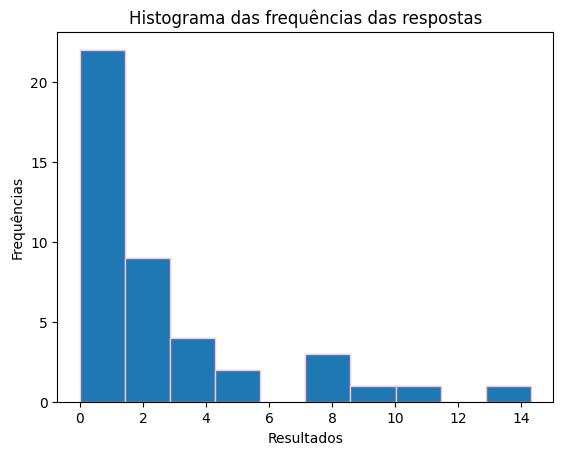

In [13]:
plt.hist(df_ELM['Resultado'], bins=10, edgecolor = 'pink')
plt.xlabel('Resultados')
plt.ylabel('Frequências')
plt.title('Histograma das frequências das respostas')
plt.show()

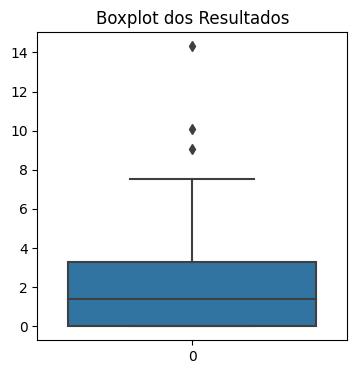

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Suponha que 'df' é o seu DataFrame
plt.figure(figsize=(4, 4)) # Define o tamanho da figura

sns.boxplot(data=df_ELM['Resultado'])

plt.title('Boxplot dos Resultados')
plt.show()


In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
df_ELM = df_ELM.drop(df_ELM.columns[0], axis=1)

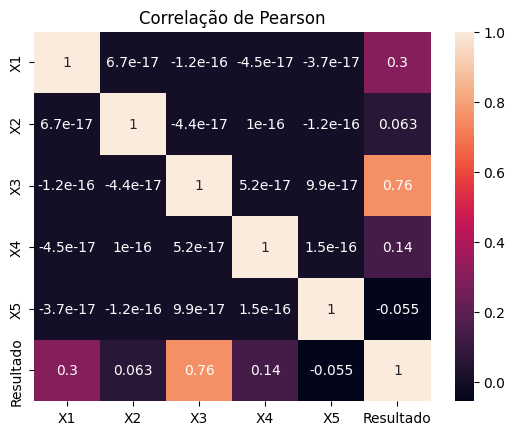

In [17]:
corr_pearson = df_ELM.corr(method='pearson')
sns.heatmap(corr_pearson, annot=True)
plt.title('Correlação de Pearson')
plt.show()

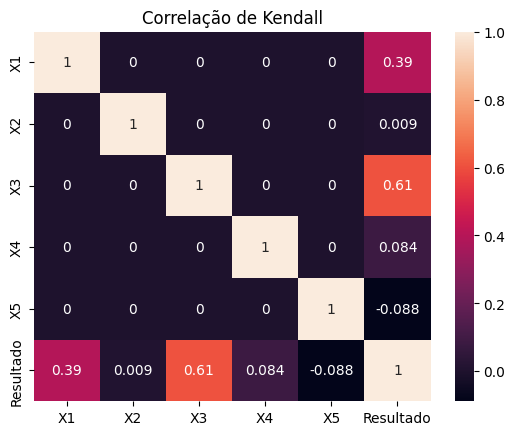

In [18]:
corr_kendall = df_ELM.corr(method='kendall')
sns.heatmap(corr_kendall, annot=True)
plt.title('Correlação de Kendall')
plt.show()

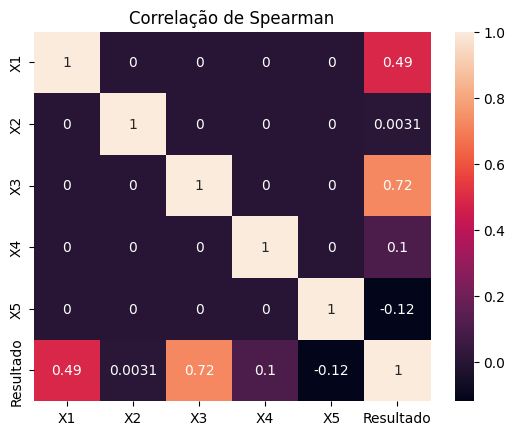

In [19]:
corr_spearman = df_ELM.corr(method='spearman')
sns.heatmap(corr_spearman, annot=True)
plt.title('Correlação de Spearman')
plt.show()

**Se a correlação é próxima de 0, isso indica que não há uma relação linear clara entre as duas variáveis. No gráfico, isso geralmente é representado por uma cor neutra, como branco ou cinza.**

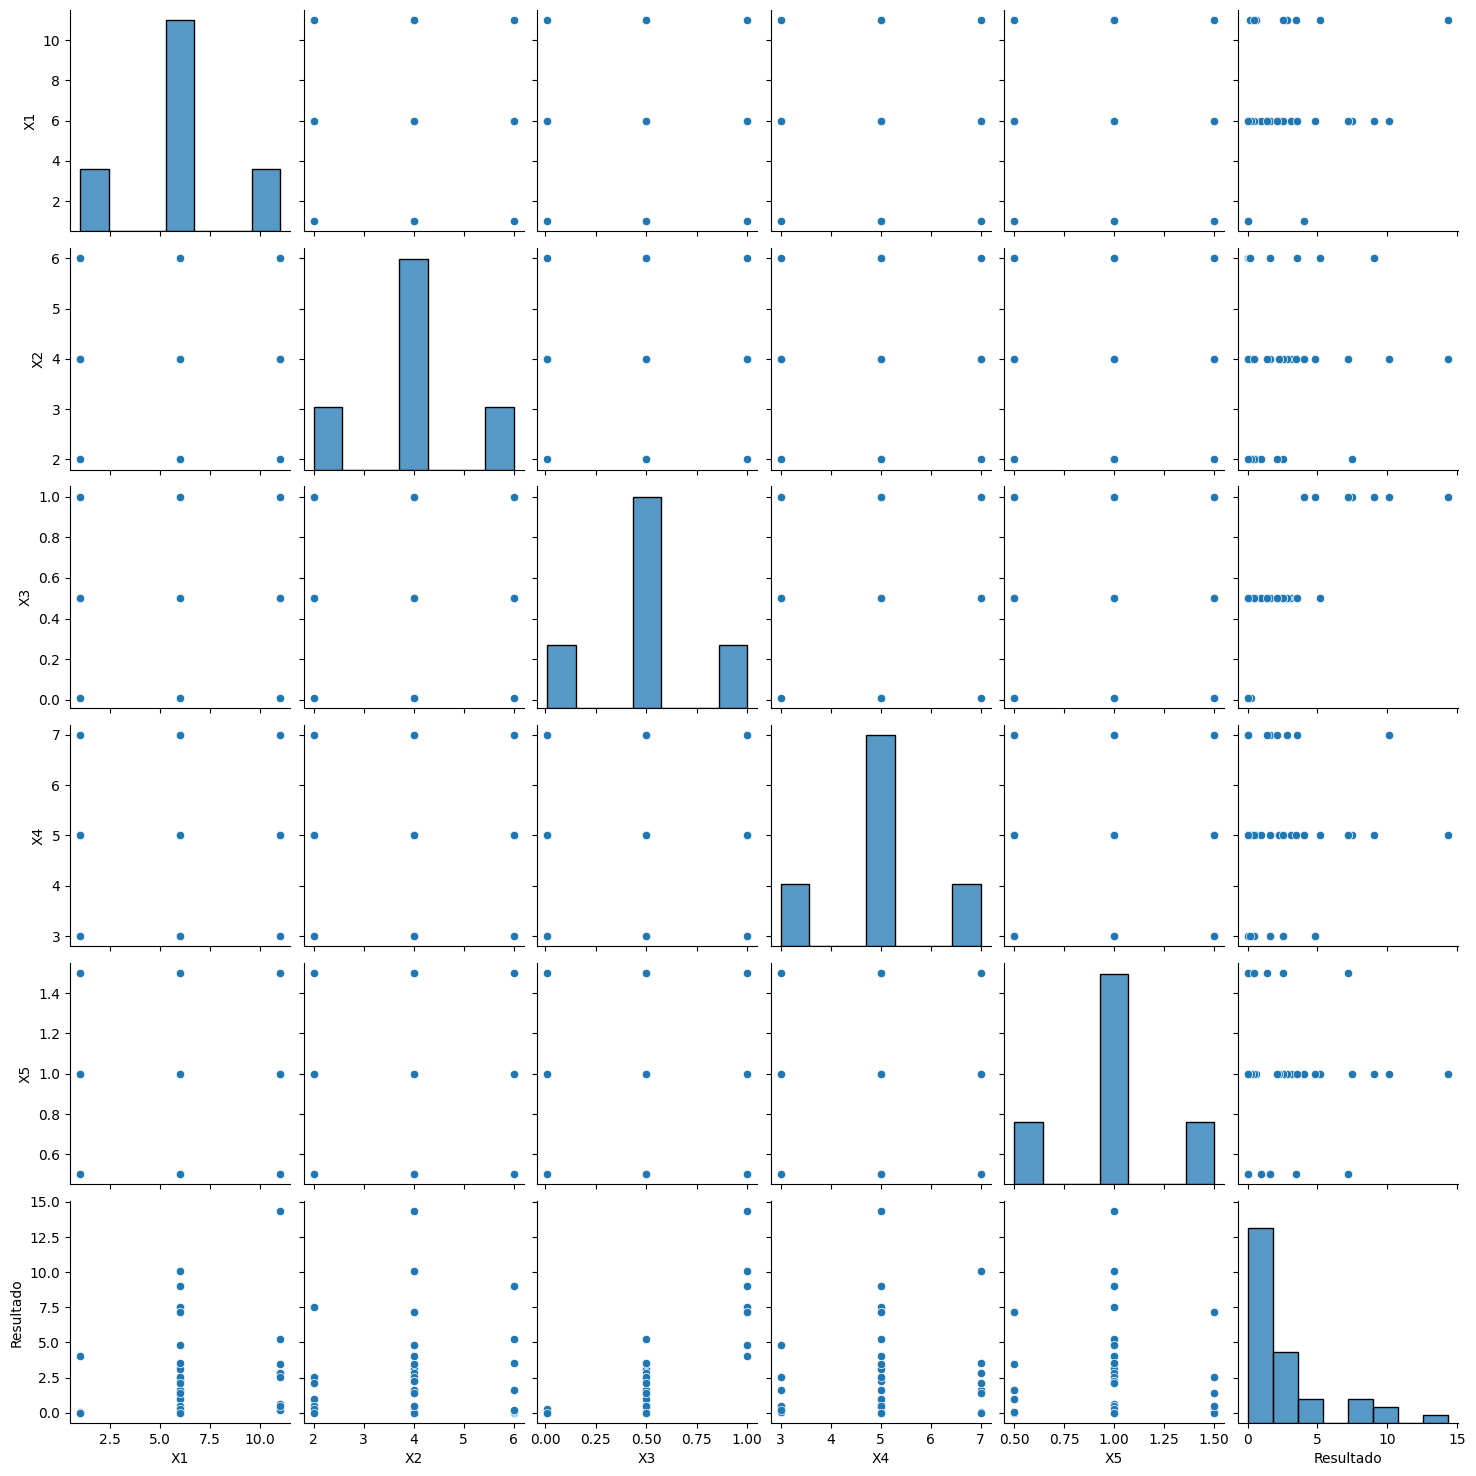

In [20]:
import seaborn as sns

# Suponha que 'df' é o seu DataFrame
sns.pairplot(df_ELM)

plt.show()


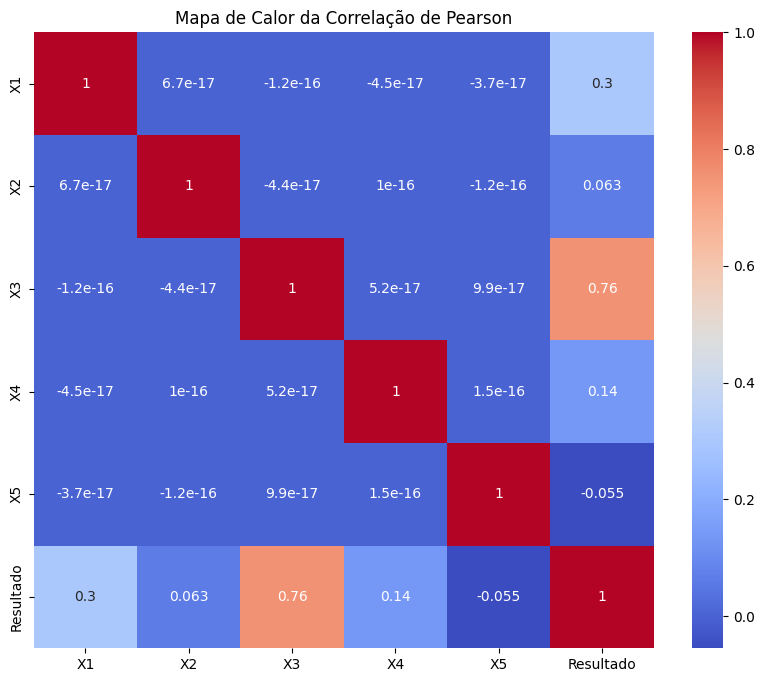

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Suponha que 'df' é o seu DataFrame
correlation_matrix = df_ELM.corr()

plt.figure(figsize=(10, 8)) # Define o tamanho da figura
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

plt.title('Mapa de Calor da Correlação de Pearson')
plt.show()


In [22]:
from sklearn.cluster import KMeans

# Supondo que você tenha os dados em um DataFrame df_ELM
X = df_ELM[['X1', 'X2', 'X3', 'X4', 'X5']]  # Selecionando as colunas com as variáveis

# Definindo o número de clusters (você pode ajustar esse valor)
num_clusters = 5

# Criando o modelo K-means
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(X)

# Obtendo os rótulos dos clusters para cada amostra
labels = kmeans.labels_

# Adicionando os rótulos dos clusters de volta ao DataFrame
df_ELM['Cluster'] = labels

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [23]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Normalizando os dados (é importante para o PCA)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Especificando o número de componentes desejados (você pode ajustar esse valor)
num_components = 3

# Criando o modelo PCA
pca = PCA(n_components=num_components)
principal_components = pca.fit_transform(X_normalized)

# Adicionando as componentes principais de volta ao DataFrame
for i in range(num_components):
    df_ELM[f'PC_{i+1}'] = principal_components[:, i]

# Variância explicada por cada componente
print("Variância explicada por cada componente:", pca.explained_variance_ratio_)

Variância explicada por cada componente: [0.2 0.2 0.2]



**Se a variância explicada por cada componente no resultado do PCA é [0.2 0.2 0.2], isso indica que cada um dos três componentes retidos explica 20% da variância total nos dados.**

**No contexto da Análise de Componentes Principais (PCA), quando os valores de variância explicada são iguais ou próximos entre os componentes, isso sugere que todos esses componentes têm contribuições semelhantes na explicação da estrutura dos seus dados.**

**No seu caso específico, cada um dos três componentes retidos tem uma contribuição igual na explicação da variância total. Isso pode significar que, no seu conjunto de dados, não há componentes que se destaquem em termos de explicação da variância, e todos são igualmente importantes na representação dos padrões presentes nos dados.**

In [24]:
#Usando regressão linear com Python (usando a biblioteca scikit-learn)

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Definindo suas variáveis independentes e dependentes
X = df_ELM[['X1', 'X2', 'X3', 'X4', 'X5']]  # Variáveis independentes
y = df_ELM['Resultado']  # Variável dependente

# Dividindo os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criando o modelo de regressão linear
model = LinearRegression()

# Treinando o modelo
model.fit(X_train, y_train)

# Fazendo previsões
predictions = model.predict(X_test)

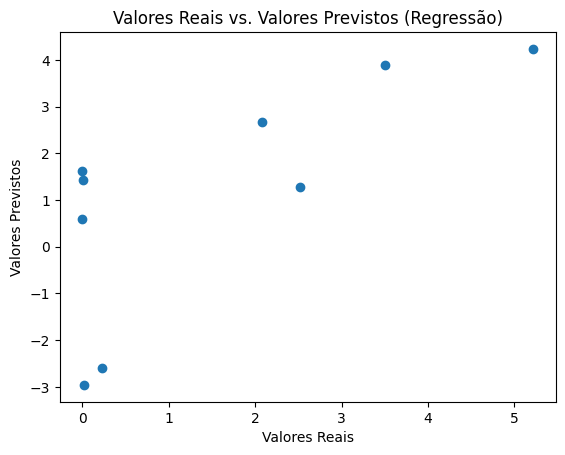

In [26]:
import matplotlib.pyplot as plt

# Supondo que 'predictions' contém as previsões do modelo e 'y_test' são os valores reais
plt.scatter(y_test, predictions)
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.title('Valores Reais vs. Valores Previstos (Regressão)')
plt.show()

In [31]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Definindo suas variáveis independentes e dependentes
X = df_ELM[['X1', 'X2', 'X3', 'X4', 'X5']]  # Variáveis independentes
y = df_ELM['Resultado']  # Variável dependente (contínua)

# Dividindo os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criando o modelo Gradient Boosting para Regressão
gb_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Treinando o modelo
gb_regressor.fit(X_train, y_train)

# Fazendo previsões
predictions = gb_regressor.predict(X_test)

# Avaliando o desempenho do modelo
mse = mean_squared_error(y_test, predictions)
print(f"Erro quadrático médio (MSE) do Gradient Boosting: {mse}")

#PELA MÉTRICA DO R²
# y_test são os valores reais do conjunto de teste
# predictions são as previsões feitas pelo seu modelo
r_squared = r2_score(y_test, predictions)
print("O R² é:", r_squared)


Erro quadrático médio (MSE) do Gradient Boosting: 2.138240373018475
O R² é: 0.3529564053913361


In [28]:
from sklearn.tree import DecisionTreeRegressor

# Criando o modelo Árvores de Decisão para Regressão
dt_regressor = DecisionTreeRegressor(random_state=42)

# Treinando o modelo
dt_regressor.fit(X_train, y_train)

# Fazendo previsões
predictions = dt_regressor.predict(X_test)

# Avaliando o desempenho do modelo
mse = mean_squared_error(y_test, predictions)
print(f"Erro quadrático médio (MSE) da Árvore de Decisão: {mse}")

from sklearn.metrics import r2_score

#PELA MÉTRICA DO R²
# y_test são os valores reais do conjunto de teste
# predictions são as previsões feitas pelo seu modelo
r_squared = r2_score(y_test, predictions)
print("O R² é:", r_squared)


Erro quadrático médio (MSE) da Árvore de Decisão: 2.6405017511111115
O R² é: 0.20096928008259862


In [30]:
from sklearn.ensemble import RandomForestRegressor

# Criando o modelo Random Forest para Regressão
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Treinando o modelo
rf_regressor.fit(X_train, y_train)

# Fazendo previsões
predictions = rf_regressor.predict(X_test)

# Avaliando o desempenho do modelo
mse = mean_squared_error(y_test, predictions)
print(f"Erro quadrático médio (MSE) do Random Forest: {mse}")

#PELA MÉTRICA DO R²
# y_test são os valores reais do conjunto de teste
# predictions são as previsões feitas pelo seu modelo
r_squared = r2_score(y_test, predictions)
print("O R² é:", r_squared)


Erro quadrático médio (MSE) do Random Forest: 2.4453782467350305
O R² é: 0.2600147528261103


**Isso sugere que, com base no MSE, o modelo Random Forest parece ter um desempenho um pouco melhor em comparação com os outros modelos para o seu conjunto de dados e as configurações utilizadas. No entanto, é sempre recomendável realizar uma análise mais aprofundada, considerando outras métricas de desempenho e possíveis ajustes de parâmetros para melhorar ainda mais a performance do modelo.**